## MLOps Zoomcamp - Module 1 Homework


**Import libraries**

In [51]:
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

**Load data**

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = pd.read_parquet('/content/drive/MyDrive/MLOps Zoomcamp/data/yellow_tripdata_2022-01.parquet')
df_val = pd.read_parquet('/content/drive/MyDrive/MLOps Zoomcamp/data/yellow_tripdata_2022-01.parquet')

**Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data**

In [54]:
print("Number of columns:", df.shape[1])

Number of columns: 19


In [55]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00000,0.97000,1.00000,N,166,166,1,7.50000,0.50000,0.50000,1.76000,0.00000,0.30000,10.56000,0.00000,0.00000
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN


**Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data**

In [56]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [57]:
print("Standrd deviation of duration: ", round(df.duration.std(), 2))

Standrd deviation of duration:  46.45


**Question 3: Fraction of the records left after dropping the outliers**

<ipython-input-58-98098e431978>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

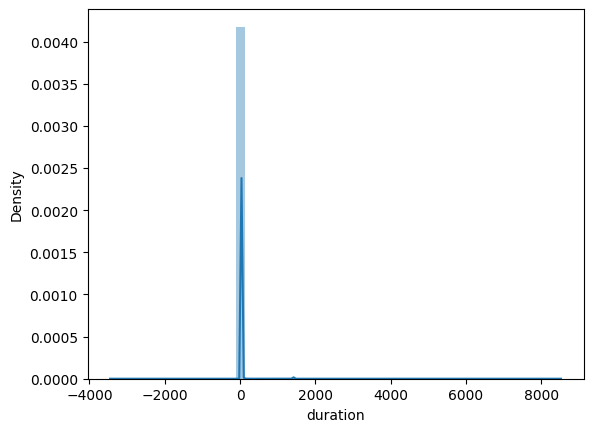

In [58]:
sb.distplot(df.duration)

In [59]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.duration.describe(percentiles=[0.90, 0.95, 0.98, 0.99, 0.995, 0.9995, 0.99995]) 

count     2463931.00000
mean           14.21220
std            46.44531
min         -3442.40000
50%            10.18333
90%            24.63333
95%            31.93333
98%            42.15000
99%            50.85000
99.5%          60.06667
99.95%       1420.58333
99.995%      1438.19672
max          8513.18333
Name: duration, dtype: float64

In [60]:
print("Fraction after removing outliers:", round(((df.duration > 1) & (df.duration < 65)).sum() / len(df) * 100))

Fraction after removing outliers: 98


**Question 4: Dimensionality after OHE**

In [61]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy() # remove outliers

In [62]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000,17.81667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000,8.40000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00000,0.97000,1.00000,N,166,166,1,7.50000,0.50000,0.50000,1.76000,0.00000,0.30000,10.56000,0.00000,0.00000,8.96667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000,10.03333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000,37.53333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN,5.96667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN,10.65000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN,11.00000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN,12.05000


In [63]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].fillna(-1).astype('int') # fill nan values
df[categorical] = df[categorical].astype('str')

In [64]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [65]:
train_dicts = df[categorical].to_dict(orient='records') # convert to dict

In [66]:
train_dicts[:10]

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'}]

In [67]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [68]:
print("Dimesionality: ", X_train.shape[1])

Dimesionality:  515


**Question 5: RMSE on train**

In [69]:
y_train = df.duration.values

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_train)

In [71]:
print("MSE:", mean_squared_error(y_train, y_pred, squared=False))

MSE: 6.986191065500608


**Question 6: RMSE on validation**

In [72]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):

  df = pd.read_parquet(filename)

  df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime 
  df['duration'] = df.duration.dt.total_seconds() / 60

  df = df[(df.duration >= 1) & (df.duration <= 60)].copy() # remove outliers
 
  df[categorical] = df[categorical].fillna(-1).astype('int').astype('str') # fill nan values

  return df

In [79]:
df_val = read_data('/content/drive/MyDrive/MLOps Zoomcamp/data/yellow_tripdata_2022-02.parquet')
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [81]:
X_val = dv.transform(val_dicts)

In [82]:
y_pred = lr.predict(X_val)

In [83]:
y_val = df_val.duration.values

In [84]:
print("MSE:", mean_squared_error(y_val, y_pred, squared=False))

MSE: 7.786408015215065
